In [1]:
import rasterio
import fiona
import rasterio.mask
import numpy as np

with fiona.open("J:\\CSE books\\4-1\\Thesis\\shapefile\\BGD_adm0.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [2]:
with rasterio.open("J:\\CSE books\\4-1\\Thesis\\out\\BGD_\\latest\\SVDNB_npp_20190401-20190430_75N060E_vcmslcfg_v10_c201905191000.avg_rade9h.tif") as src2:
    out_image2, out_transform2 = rasterio.mask.mask(src2, shapes, crop=True)
    out_meta2 = src2.meta

In [3]:
src2.meta


{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 1120,
 'height': 1415,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0041666667, 0.0, 88.01041689075001,
        0.0, -0.0041666667, 26.635416279749997)}

In [4]:
with rasterio.open("J:\\CSE books\\4-1\\Thesis\\codes\\gmap1zoom7_modified.tif") as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

In [ ]:
out_meta.update({"driver": "GTiff",
                 "height": 1415,
                 "width": 1120,
                 "transform": out_transform2})

with rasterio.open("J:\\CSE books\\4-1\\Thesis\\out\\gmap\\bdzoom7.tif", "w", **out_meta) as dest:
    dest.write(out_image)

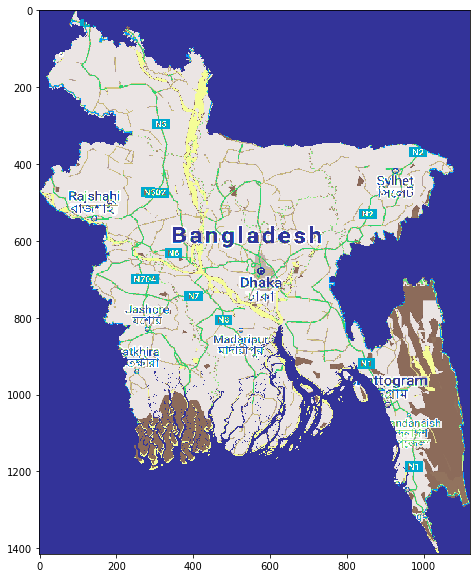

In [5]:
import fiona
import rasterio
import rasterio.plot
import matplotlib as mpl
import matplotlib.pyplot as plt
from descartes import PolygonPatch

src = rasterio.open("J:\\CSE books\\4-1\\Thesis\\out\\gmap\\bdzoom7.tif")
import matplotlib.image as mpimg

plt.figure(figsize = (10,10))
plt.imshow(src.read(1), cmap='terrain')
plt.show()

In [6]:
src.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 1120,
 'height': 1415,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0041666667, 0.0, 88.01041689075001,
        0.0, -0.0041666667, 26.635416279749997)}